In [2]:
import geostatspy.GSLIB as GSLIB                          # GSLIB utilies, visualization and wrapper
import geostatspy.geostats as geostats 

In [3]:
import os                                                 # operating system, set current working directory 
import matplotlib.pyplot as plt                           # plotting
import numpy as np                                        # arrays and matrix math
from mpl_toolkits.mplot3d import Axes3D                   # 3D scatter plots
import pandas as pd 

In [4]:
nx = 100; ny = 100; nz = 100
hsiz = 10.0; vsiz = 1.0; seed = 73073
xmin = 0.0; ymin = 0.0; zmin = 0.0
xmax = xmin + nx * hsiz; ymax = ymin + ny * hsiz; zmax = zmin + nz * vsiz
xmn = xmin + hsiz*0.5; ymn = ymin + hsiz*0.5; zmn = zmin + vsiz*0.

In [5]:
data=pd.read_csv(r"C:\Users\eobasi.2NCJQ13\Downloads\wells_with_fracturability_predictions.csv")

In [6]:
data

,API_UWI,latitude,longitude,TVDBase_ft,GammaRay_API,Resistivity_Ohms*m,DensityPorosity_v/v,Easting,Northing,geometry,Brittleness Index,Fracability Index,Predicted Quartz,Predicted Poisson Ratio,Normalized Poisson Ratio,Fracability Index Average,Fracability Index Weighted,Normalized Quartz,Fracability Index Normalized
0,49-027-20898,43.47085,-104.53229,-3.917147,-0.409513,-0.349521,-0.097696,537829.909710,4.813210e+06,POINT (537829.9097102416 4813210.27655659),0.616770,0.387992,61.364590,0.103050,0.716718,30.733820,40.944076,0.616770,0.666744
1,49-009-28403,42.90894,-105.68061,1.686416,1.355136,-0.189675,-0.653612,444442.652049,4.750927e+06,POINT (444442.6520488565 4750927.485992973),0.463645,0.307650,48.968000,0.098157,0.710433,24.533078,32.678052,0.463645,0.587039
2,49-009-28403,42.90894,-105.68061,-0.934772,-1.197622,-0.313175,-0.375654,444442.652049,4.750927e+06,POINT (444442.6520488565 4750927.485992973),0.438707,0.286330,46.949037,0.086699,0.695718,23.517868,31.328258,0.438707,0.567212
3,49-009-28403,42.90894,-105.68061,-0.376330,-1.207595,-0.200491,-0.792591,444442.652049,4.750927e+06,POINT (444442.6520488565 4750927.485992973),0.488847,0.324514,51.008228,0.103676,0.717521,25.555952,34.040044,0.488847,0.603184
4,49-009-28403,42.90894,-105.68061,0.688868,-0.772206,0.031920,-1.348507,444442.652049,4.750927e+06,POINT (444442.6520488565 4750927.485992973),0.397835,0.273395,43.640112,0.096409,0.708188,21.868261,29.125544,0.397835,0.553011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4068,49-027-20887,43.13871,-104.75921,-1.985569,-1.197097,-0.348892,-0.792591,519582.193183,4.776247e+06,POINT (519582.1931833654 4776246.628662026),0.448199,0.286590,47.717477,0.080892,0.688260,23.899185,31.838615,0.448199,0.568229
4069,49-005-29242,44.75696,-105.59769,-3.029582,-1.035171,-0.354174,-0.236675,452694.153863,4.956126e+06,POINT (452694.1538627112 4956126.046253814),0.374027,0.255351,41.712701,0.088462,0.697981,20.900581,27.837955,0.374027,0.536004
4070,49-005-24653,43.84335,-105.89690,-1.828268,-1.390253,-0.291418,-0.097696,427902.791043,4.854865e+06,POINT (427902.7910428923 4854865.210430323),0.719520,0.415011,69.683012,0.071521,0.676224,34.877266,46.479181,0.719520,0.697872
4071,49-005-24653,43.84335,-105.89690,-1.500119,-1.222029,-0.148551,-0.653612,427902.791043,4.854865e+06,POINT (427902.7910428923 4854865.210430323),0.679043,0.453153,66.406110,0.147093,0.773283,33.276602,44.319771,0.679043,0.726163


In [7]:
df=data

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
latitude,4073.0,4.362984e+01,0.447388,4.275057e+01,4.339697e+01,4.359471e+01,4.383005e+01,4.505157e+01
longitude,4073.0,-1.053790e+02,0.541059,-1.068353e+02,-1.058088e+02,-1.054312e+02,-1.049782e+02,-1.042303e+02
TVDBase_ft,4073.0,-1.933533e+00,1.966491,-7.428862e+00,-3.754626e+00,-1.700583e+00,-6.257601e-01,2.442391e+00
GammaRay_API,4073.0,-6.892603e-01,0.713254,-3.418393e+00,-1.183713e+00,-7.580343e-01,-2.654335e-01,7.043009e+00
Resistivity_Ohms*m,4073.0,-2.639862e-01,0.827468,-4.092583e-01,-3.507783e-01,-3.271348e-01,-2.735596e-01,4.120836e+01
DensityPorosity_v/v,4073.0,-6.369943e-01,0.478675,-1.765444e+00,-9.315698e-01,-6.536118e-01,-3.756537e-01,8.751577e-01
Easting,4073.0,4.694711e+05,43588.151381,3.545267e+05,4.347349e+05,4.655536e+05,5.017597e+05,5.624927e+05
Northing,4073.0,4.830975e+06,49728.666611,4.733125e+06,4.805346e+06,4.826936e+06,4.853189e+06,4.988818e+06
Brittleness Index,4073.0,5.453274e-01,0.174214,0.000000e+00,4.155001e-01,5.454617e-01,6.645892e-01,1.000000e+00
Fracability Index,4073.0,3.433450e-01,0.095271,-5.689192e-02,2.804725e-01,3.449792e-01,4.196324e-01,7.492623e-01


In [9]:
df = df.rename(columns={'Northing': 'Y', 'Easting': 'X'})

In [10]:
from skgstat import Variogram, OrdinaryKriging, plotting


C:\Users\eobasi.2NCJQ13\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


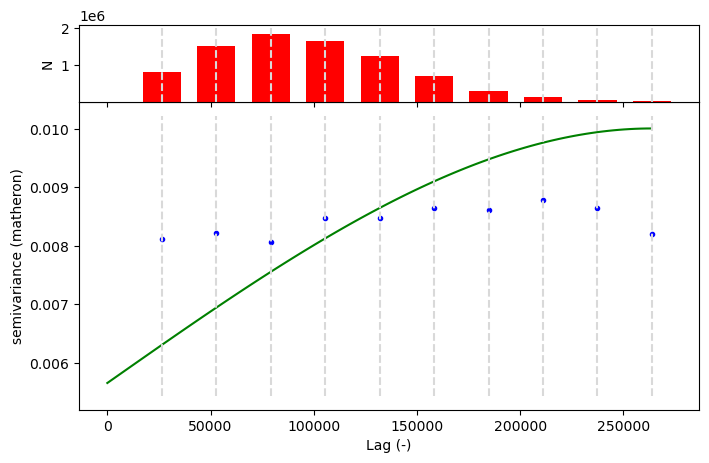

In [12]:
V1 = Variogram(df[['X', 'Y']].values, df['Fracability Index Normalized'].values, use_nugget = True,normalize=False)
V1.plot(show=True);

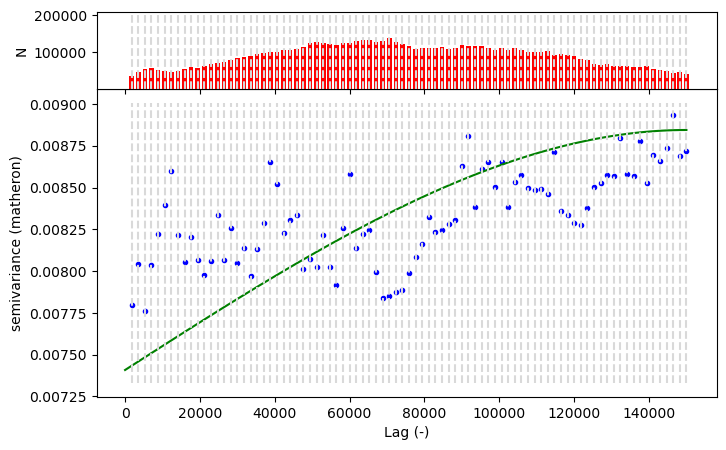

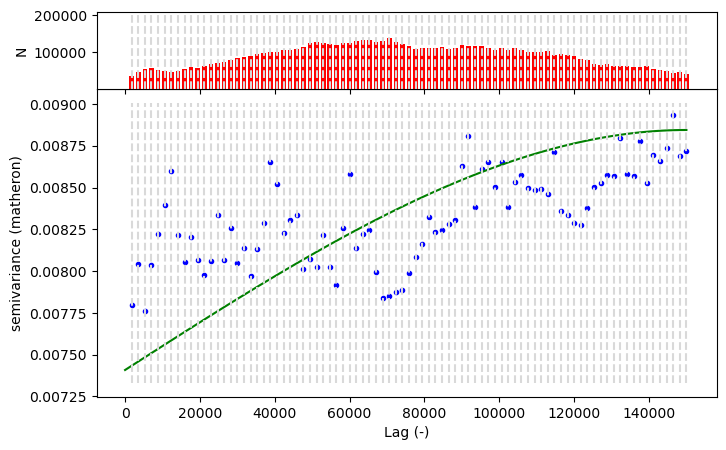

In [13]:
V1.maxlag = 150000
V1.n_lags = 85
V1.plot(show=False)

C:\Users\eobasi.2NCJQ13\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\eobasi.2NCJQ13\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\eobasi.2NCJQ13\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\eobasi.2NCJQ13\anaconda3\lib\site-packages\skgstat\plotting\variogram_plot.py:123: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


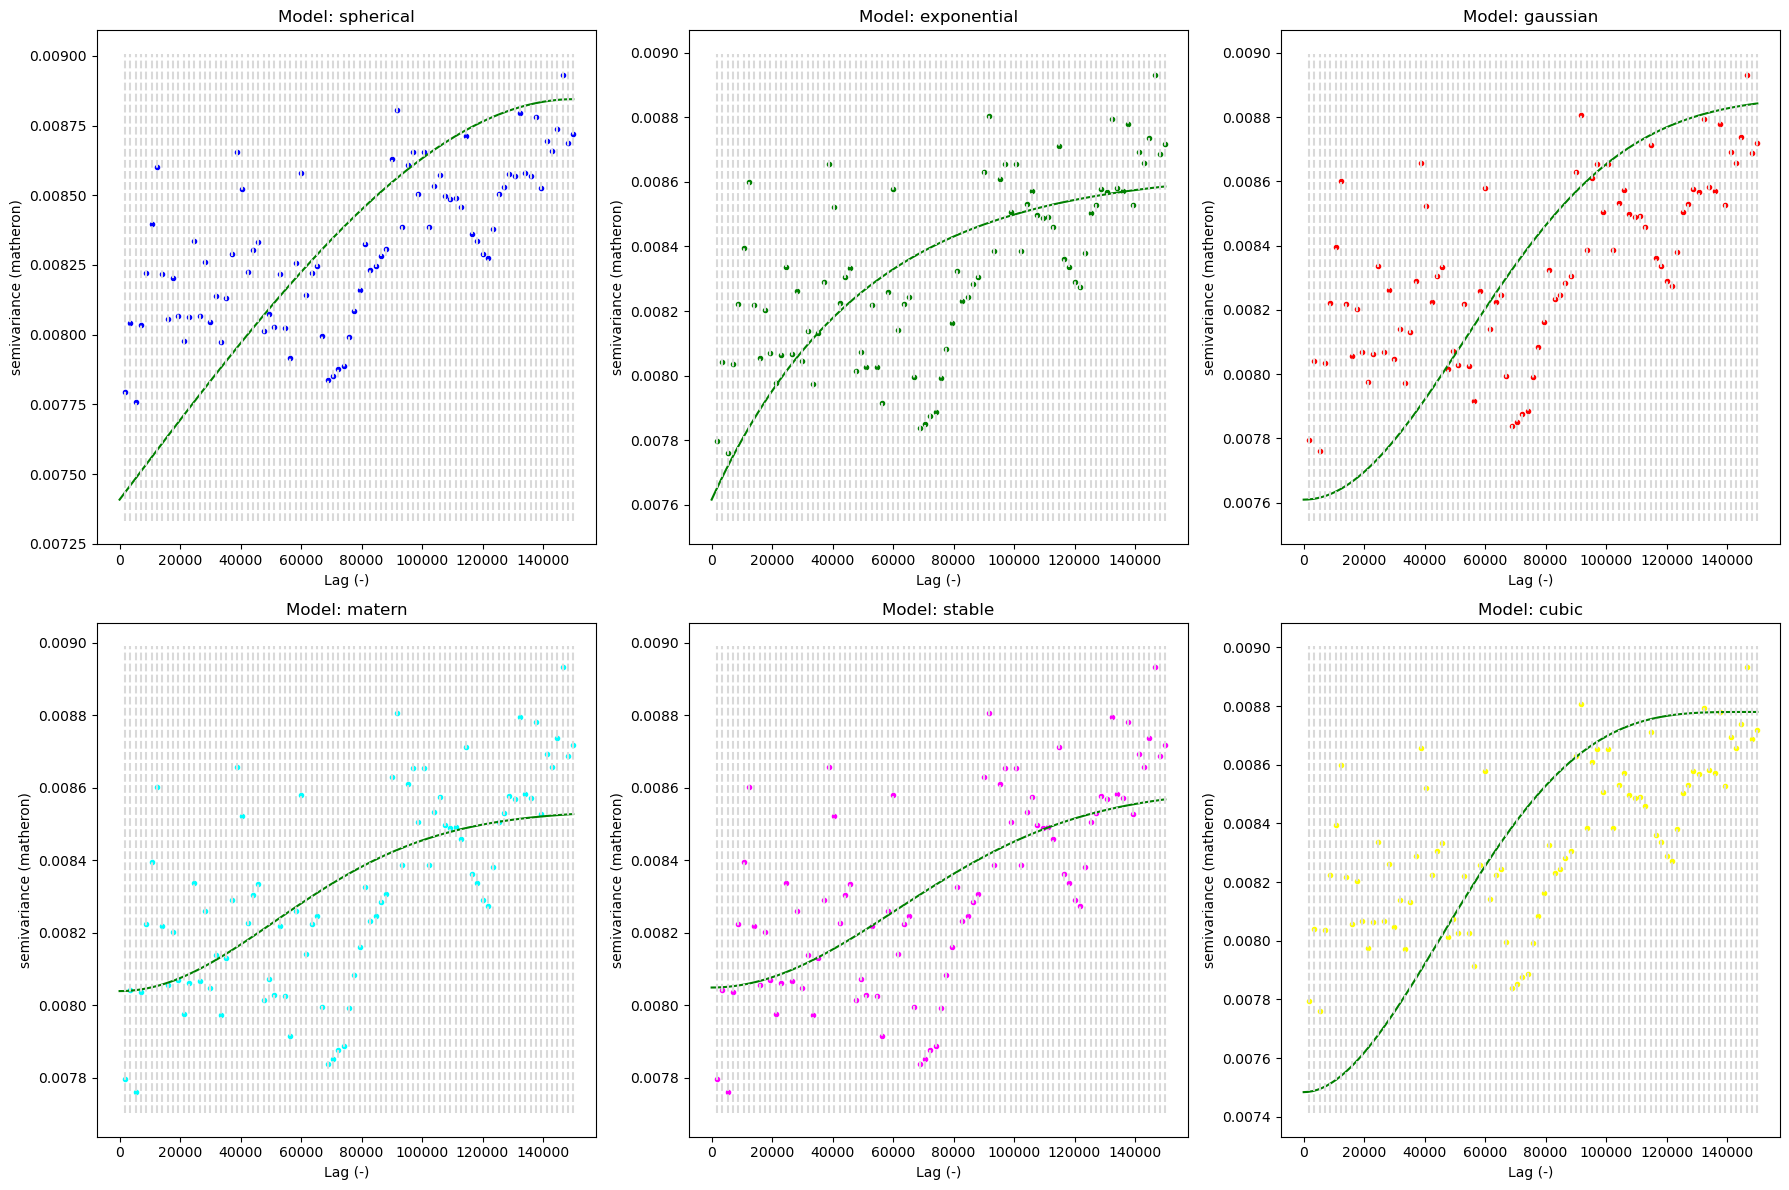

In [14]:
import matplotlib.pyplot as plt
from skgstat import Variogram

# Define the models
models = ['spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic']
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']  # Define colors for each model

# Initialize lists to store the RMSE values and variogram models
rmse_values = []
variogram_models = []

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.ravel()  # Flatten axes

# Switch the backend to matplotlib
from skgstat import plotting
plotting.backend('matplotlib')

# Iterate through models
for i, model in enumerate(models):
    V1.model = model
    rmse_values.append(V1.rmse)
    variogram_models.append(V1)
    
    # Plot the variogram model on the corresponding subplot
    V1.plot(axes=axes[i], hist=False)
    
    # Set the title of the subplot to the name of the model
    axes[i].set_title('Model: %s' % model)
    
    # Set the color of the model
    axes[i].lines[0].set_color(colors[i])
    
    # Remove grid lines
    axes[i].grid(False)

plt.tight_layout()  # Adjust the layout to avoid overlaps
plt.show()

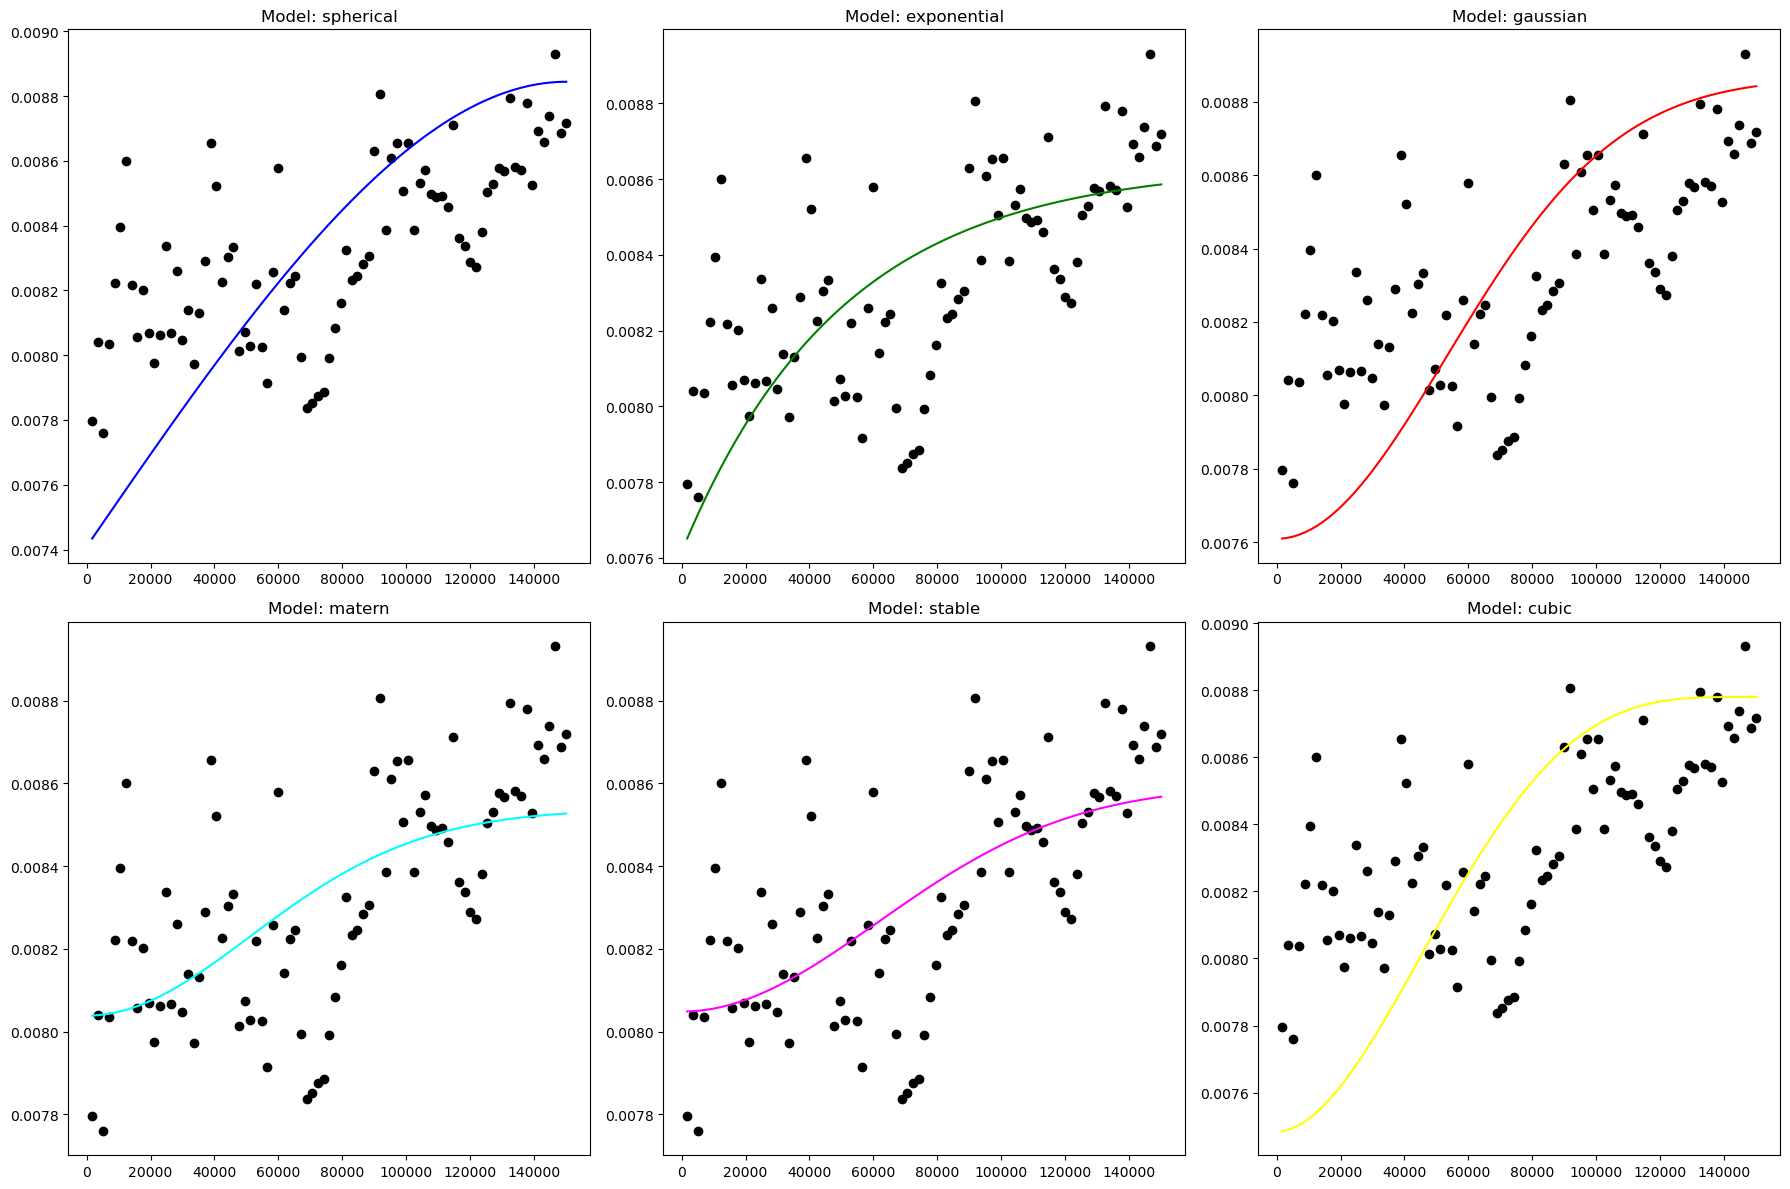

In [16]:
import matplotlib.pyplot as plt
from skgstat import Variogram

# Define the models
models = ['spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic']
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow']  # Define colors for each model

# Initialize lists to store the RMSE values and variogram models
rmse_values = []
variogram_models = []

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
axes = axes.ravel()  # Flatten axes

# Iterate through models
for i, model in enumerate(models):
    V1.model = model
    rmse_values.append(V1.rmse)
    variogram_models.append(V1)
    
    # Plot the variogram model on the corresponding subplot
    axes[i].plot(V1.bins, V1.experimental, color='black', linestyle='', marker='o')
    axes[i].plot(V1.bins, V1.fitted_model(V1.bins), color=colors[i])
    
    # Set the title of the subplot to the name of the model
    axes[i].set_title('Model: %s' % model)
    
    # Remove grid lines
    axes[i].grid(False)

plt.tight_layout()  # Adjust the layout to avoid overlaps
plt.show()


In [48]:
V=variogram_models[5]

In [49]:
V.mse

4.2771602995861685e-07

In [50]:
xv = df['X'].values
yv = df['Y'].values

xmin, xmax = min(xv), max(xv)
ymin, ymax = min(yv), max(yv)

# We determine the resolution in x direction:
res_x = 100
# We determine the resolution in y direction
# based on res_x to make a regular grid:
res_y = int((ymax - ymin)*res_x/(xmax - xmin))

# We build the grid:
xx,yy = np.mgrid[xmin:xmax:complex(res_x), 
                 ymin:ymax:complex(res_y)]

print('X coordinates:\n', xx[:5,:5].round(1))
print('Y coordinates:\n', yy[:5,:5].round(1))

X coordinates:
 [[354526.7 354526.7 354526.7 354526.7 354526.7]
 [356627.4 356627.4 356627.4 356627.4 356627.4]
 [358728.1 358728.1 358728.1 358728.1 358728.1]
 [360828.7 360828.7 360828.7 360828.7 360828.7]
 [362929.4 362929.4 362929.4 362929.4 362929.4]]
Y coordinates:
 [[4733125.  4735238.2 4737351.3 4739464.5 4741577.7]
 [4733125.  4735238.2 4737351.3 4739464.5 4741577.7]
 [4733125.  4735238.2 4737351.3 4739464.5 4741577.7]
 [4733125.  4735238.2 4737351.3 4739464.5 4741577.7]
 [4733125.  4735238.2 4737351.3 4739464.5 4741577.7]]


In [51]:
# We build our kriging model:
ok =  OrdinaryKriging(V, min_points=5, max_points=20, mode='exact')

# We calculate the hydraulic head on our regular grid,
# and we make the result in a good shape
hh_hat = ok.transform(xx.flatten(), yy.flatten()).reshape(xx.shape)

# We calculate the kriging error on our grid:
s2 = ok.sigma.reshape(xx.shape)

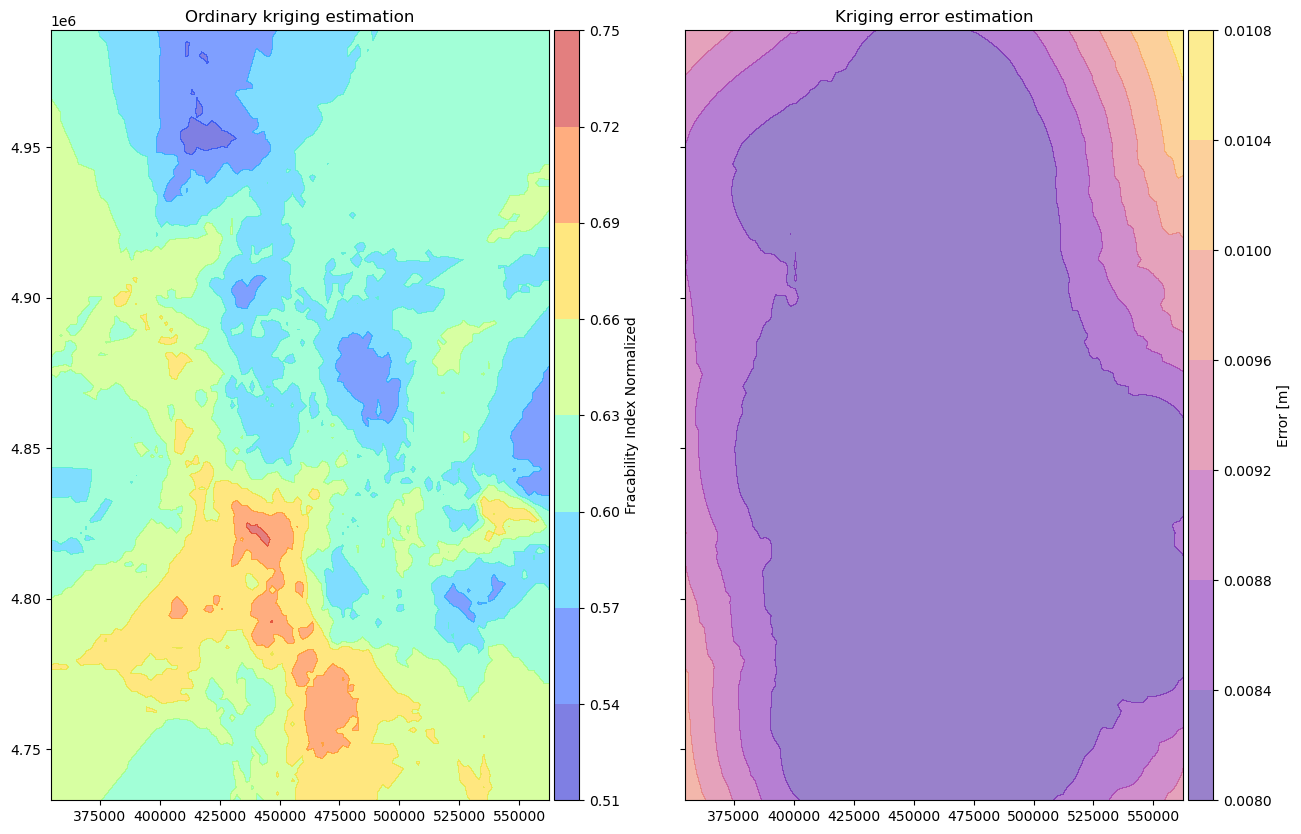

In [52]:
fig, axs = plt.subplots(1, 2 ,figsize=(15, 10), sharey=True)

ax = axs[0]

# Contour fringes of the kriging process:
ctr_hh = ax.contourf(xx, yy, hh_hat,
                     
                     cmap = "jet", 
                     alpha = 0.5)

ax.set_title("Ordinary kriging estimation")
from mpl_toolkits.axes_grid1 import make_axes_locatable


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(ctr_hh, cax=cax, label = 'Fracability Index Normalized')

# We add the location of points of our dataset
#gdf.plot(ax = ax, c = "black", marker= '.', markersize = 2)

ax = axs[1]

# Contour fringes of the kriging error:
ctr_err = ax.contourf(xx, yy, s2,
                      
                      cmap = "plasma",
                      alpha = 0.5)
ax.set_title("Kriging error estimation")

# We add the location of points of our dataset
#gdf.plot(ax = ax, c = "black", marker= '.', markersize = 2)

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
plt.colorbar(ctr_err, cax=cax, label = 'Error [m]')

plt.show()

NameError: name 'V1' is not defined

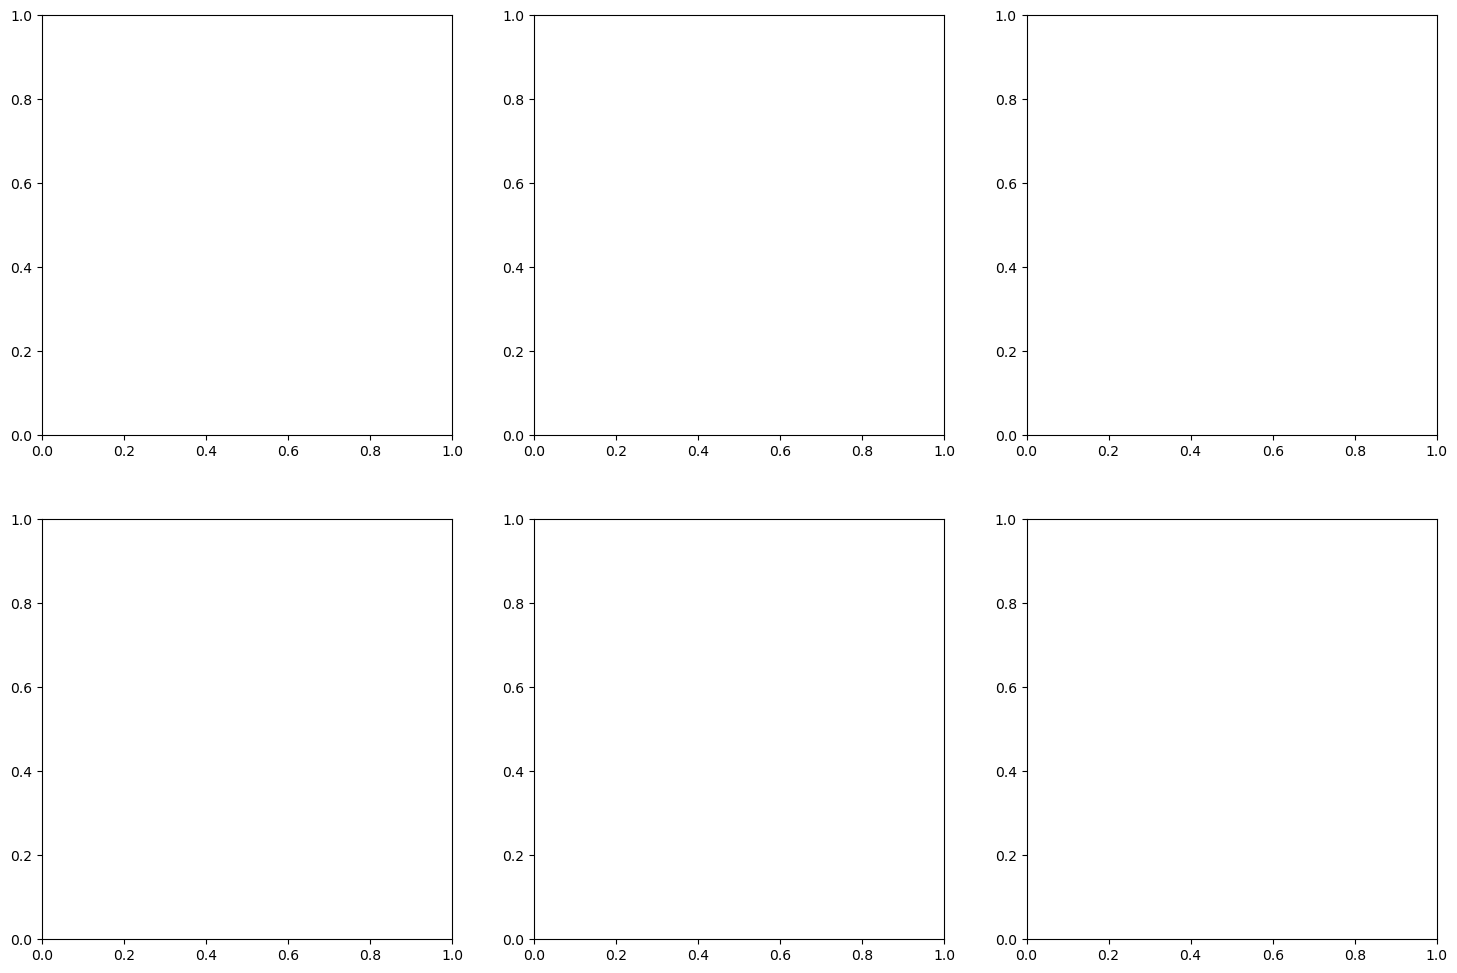

In [11]:
from skgstat import Variogram
import matplotlib.pyplot as plt

# Create a list of models to iterate through
models = ['spherical', 'exponential', 'gaussian', 'matern', 'stable', 'cubic']

# Initialize an empty list to store the models' RMSE
rmse_values = []

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))  # Adjust the size of the whole figure as needed
axes = axes.flatten()  # Flatten the axes array to iterate through it

# Make sure the backend is set to 'matplotlib'
from skgstat import plotting
plotting.backend('matplotlib')

for i, model in enumerate(models):
    V1.model = model
    rmse_values.append(V1.rmse)
    
    # Plot the variogram model on the corresponding subplot
    V1.plot(axes=axes[i], hist=False)
    
    # Set the title of the subplot to the name of the model and its RMSE
    axes[i].set_title('Model: %s; RMSE: %.2f' % (model, V1.rmse))

plt.tight_layout()  # Adjust the layout to avoid overlaps
plt.show()
